# The import part

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
import random
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
from ipyleaflet import Map, Marker
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

%matplotlib inline

# Helper functions


In [2]:
def generate_n_clust_testing(data,n=3,metric='euclidean',verbose = True):
    """
    Function that generates a plot of the interias of different clustering
    in term of the number of clusters n
    
    :param data: the dataframe we are testing
    :param n: the number of clusters to test
    :param metric: the metric to test 
    :param verbose: the verbosity of the algorithm
    :return: 
    """
    #We start by applying the temporal k means with a specified metric while varying 
    #the number of clusters k according to the parameter n and then we get the total inertias 
    # of each call and place them in the list inertias
    inertias = np.array([TimeSeriesKMeans(n_clusters= k ,
                                          metric=metric,
                                          verbose=verbose,
                                          max_iter=50,
                                          dtw_inertia=True,
                                          init='k-means++').fit(data).inertia_
        for k in range(1,n+1)])
    #We then plot the results for visual interpretation
    print(inertias)
    plt.xticks(np.arange(1, n+1, 1))
    plt.plot(range(1,n+1),inertias)
    plt.grid()
    plt.show()
    


    
def get_class_elements(df,cls,paritions):
    """
    Get the elements of a give class acording to the data, the paritionning and the given class
    
    :param df: original dataframe
    :param cls: the classe of which we want to construct the members
    :param paritions: a list of labels which indexes correspond to the dataframe's
    :return:  a list of timeseries that are labeled acording to "cls" and their indexes
    """
    res = [df.iloc[i,:] for i in [j for j in df.index] if paritions[i]==cls]
    res = pd.DataFrame.from_records(res)
    indexes = [i for i in [j for j in df.index] if paritions[i]==cls]
    return res,indexes

def mutate_to_days(data):
    
    cols = ['D'+str(i+1) for i in range(int(len(list(data))))]
    rows = int(len(data.index))
    tmp = pd.DataFrame(index=np.arange(rows),columns=cols)
    for i in range(rows):
        for j in range(len(cols)) :
            tmp.iloc[i,j]=np.mean(np.array([data.iloc[i,j]]))
            
    return tmp


def mutate_to_mean_by_weeks(data):
    """
    Function to replace 7 observations of a week into 1 mean observation. i.e if the dataset was
    of shape N_parking x 77, it will become N_parking x 77/7
    """
    
    cols = ['W'+str(i+1) for i in range(int(len(list(data))/7))]
    rows = int(len(data.index))
    tmp = pd.DataFrame(index=np.arange(rows),columns=cols)
    for i in range(rows):
        for j in range(len(cols)):
            base = 7*(j-1)
            offset = base+6
            tmp.iloc[i,j]=np.mean(np.array([data.iloc[i,base:offset]]))
            
    return tmp

def mutate_to_mean_by_days(data):
    """
    Function to replace 77 observations of a day into 1 mean observation. i.e if the dataset was
    of shape N_parking x 77, it will become N_parking x 7
    """
    cols = ['Tue','Wed','Thu','Fri','Sat','Sun','Mon']
    rows = int(len(data.index))
    
    tmp = pd.DataFrame(index=np.arange(rows),columns=cols)
    for i in range(rows):
        for j in range(len(cols)):
            mean_days= np.mean(np.array(data.iloc[i,[j+(i*7) for i in range(11)]]))
            tmp.iloc[i,j]=mean_days
            
    return tmp

def plot_paritions(p):
    """
    Plot a cluster 
    :param p: the list of time series of the same cluster
    """
    for i in p.index:
        plt.xlabel
        red_patch = mpatches.Patch(color='red', label='Le centroïde du cluster')
        dark_patch = mpatches.Patch(color=(0, 0, 0, 0.25), label='Les séries temporelles du cluster')
        plt.legend(handles=[red_patch,dark_patch])
        if i != p.index[-1]:
            plt.plot(p.iloc[i,:],color=(0, 0, 0, 0.25))
        else:
            plt.plot(p.iloc[i,:],color='#FF0000')


def create_ids_map_remap(path):
    """
    :param path: 
    :return: 
    """
    df = pd.read_csv(path)
    res = {code:i for code,i in zip(set(df.iloc[:,0].values),range(28))}
    res_reverse = {i:code for i,code in enumerate(res)}
    return df,res,res_reverse

### Defining the datasets


In [3]:
df_per_days = mutate_to_days(pd.read_csv('dataset/semhouli_qst4.csv'))
df_per_week = mutate_to_mean_by_weeks(df_per_days)
df_per_day  = mutate_to_mean_by_days(df_per_days)
df=df_per_days

### Separating the dataframe into a list of dataframes for an easier ploting of the series


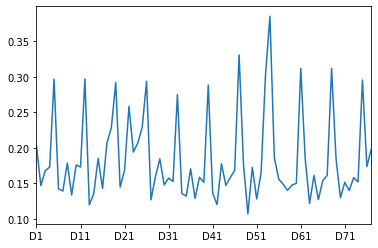

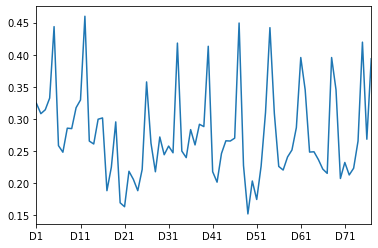

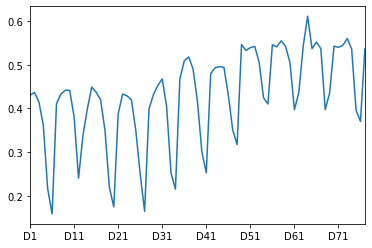

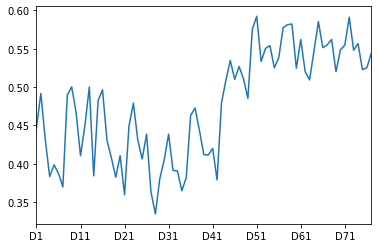

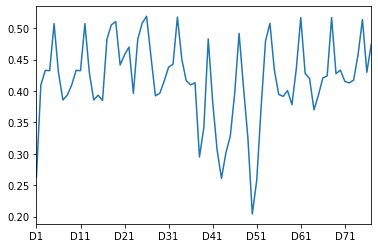

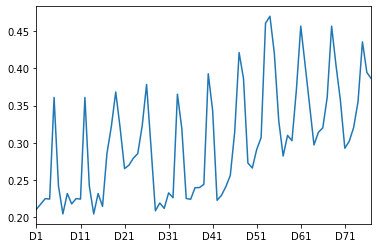

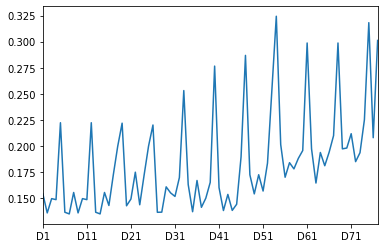

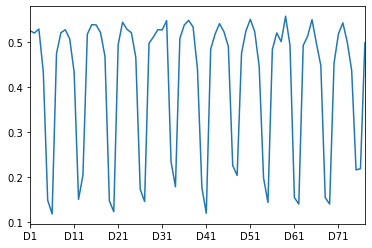

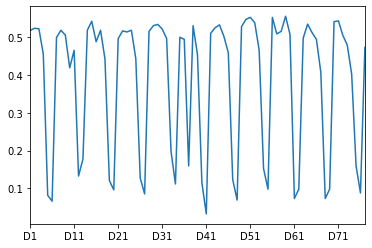

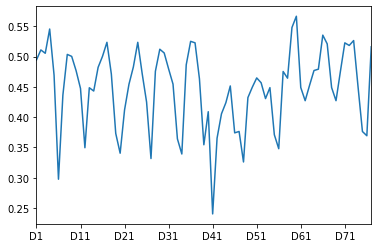

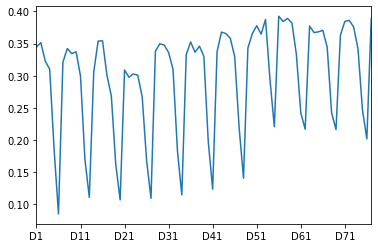

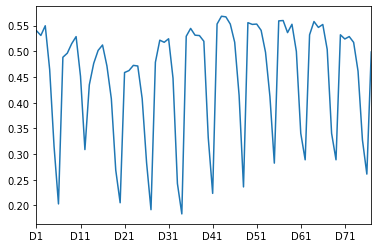

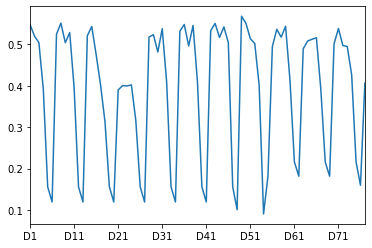

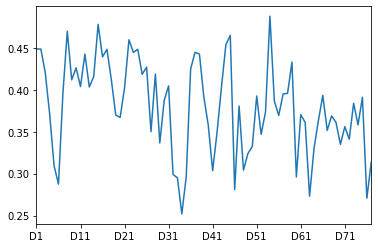

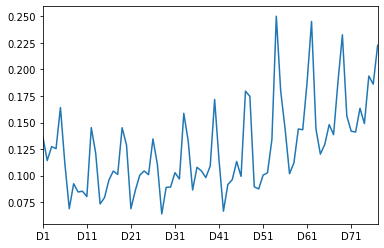

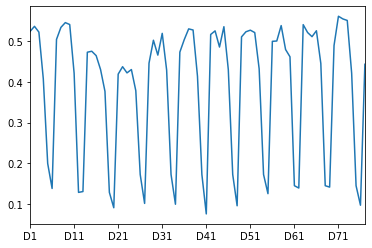

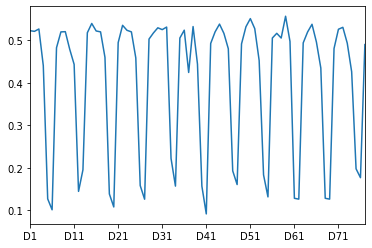

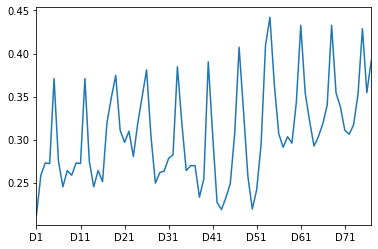

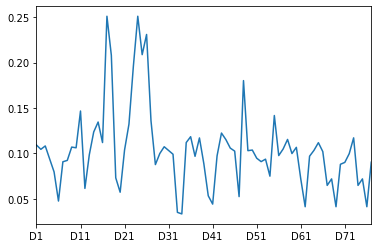

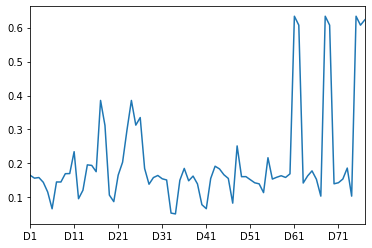

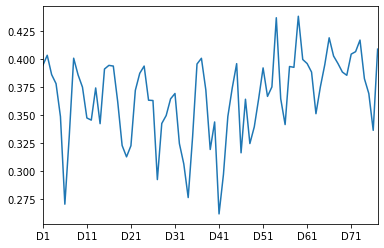

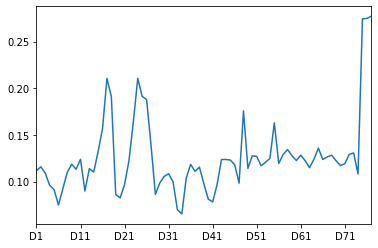

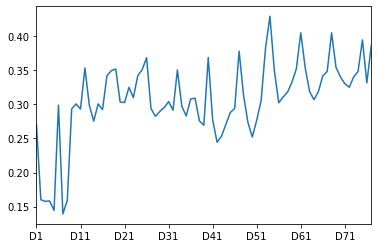

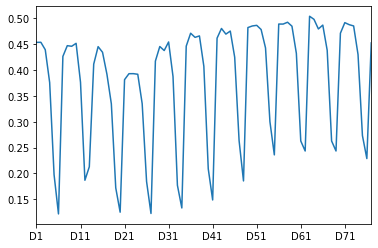

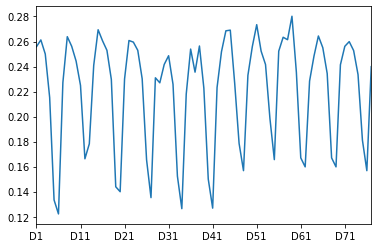

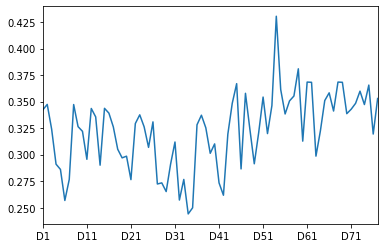

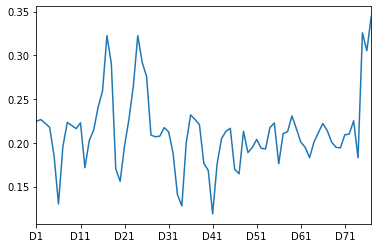

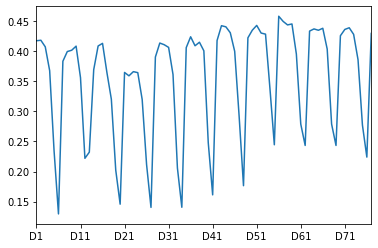

In [4]:
n_cols=df.index
rows = [df.iloc[i,:] for i in [j for j in n_cols] ]
for index,row in enumerate(rows) :
    row.plot()
    plt.show()
    

[0.82882887 0.37861684 0.25029681 0.23346741 0.16944728 0.14951149
 0.11472222 0.10796086 0.08283469 0.0788089  0.08258781 0.0551351
 0.05345689 0.04349796 0.03859633]
[0.59175556 0.33308345 0.21226057 0.14644702 0.12244041 0.11286199
 0.09236351 0.0849604  0.07325207 0.05952232 0.05571243 0.04746512
 0.04411681 0.04168826 0.0339761 ]


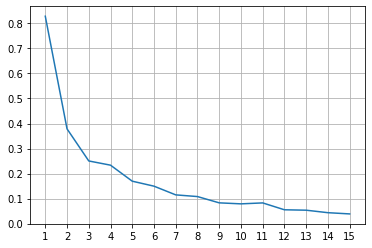

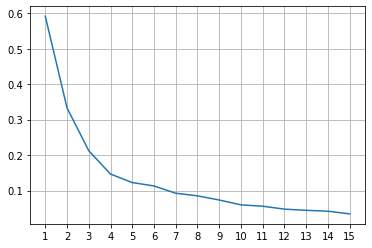

In [5]:
metrics = ['euclidean','dtw']
for metric in metrics:
    generate_n_clust_testing(data=rows,n=15,verbose = False,metric=metric)
    plt.show()

0.546 --> 0.379 --> 0.379 --> 
0.37861684120246075
[0, 1, 5, 6, 14, 17, 18, 19, 21, 22, 24, 26]
0.37861684120246075
[2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 15, 16, 20, 23, 25, 27]
0.749 --> 0.384 --> 0.286 --> 0.283 --> 0.283 --> 
0.2829368964333757
[0, 1, 5, 6, 10, 13, 14, 17, 18, 19, 20, 21, 22, 24, 25, 26]
0.2829368964333757
[2, 3, 4, 7, 8, 9, 11, 12, 15, 16, 23, 27]


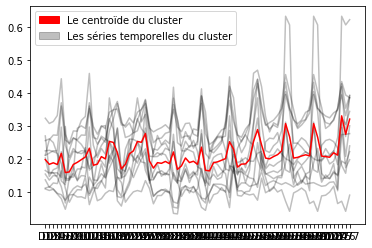

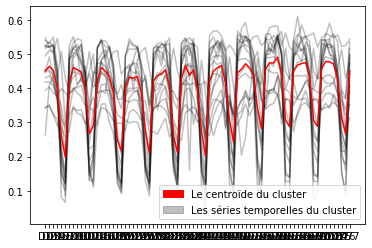

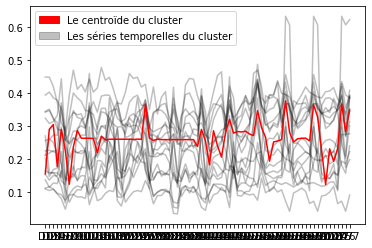

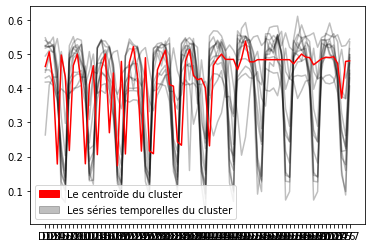

In [6]:
#Here we will launch the clustering depending on the parameters
k = 2

for metric in metrics : 
    dtw = TimeSeriesKMeans(n_clusters= k ,
                     metric=metric,
                     verbose=True,
                     max_iter=100000,
                     init='k-means++',
                     dtw_inertia=True).fit(rows)
    cls = [i for i in range(k)]
    prts = []
    indexes = []
    for cl in cls :
        print(dtw.inertia_)
        tmp,index=get_class_elements(df=df,cls=cl,paritions=dtw.labels_)
        #Here we just add the centroid of the cluster at the end
        tmp = pd.concat([tmp, pd.DataFrame(np.reshape(dtw.cluster_centers_[cl],(1,len(list(df)))),index=[tmp.index[-1]+1],columns=tmp.columns)], axis=0)
        indexes.append(df.iloc[index,:])
        prts.append(tmp)
        print(index)
    for prt in prts:
        plot_paritions(prt)
        plt.show()
        